In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
args = Namespace(
    seed=1234,
    data_file="sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)
# 设置随机种子来保证结果可复现
np.random.seed(args.seed)

In [3]:
def generae_data(num_samples):
    X = np.arange(num_samples)
    random_noise = np.random.uniform(-10, 10, size=num_samples)
    y = X * 3.65 + 10 + random_noise
    return X, y

In [4]:
X, y = generae_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=("X", "y"))
df.head()

,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555
3,3.0,26.657172
4,4.0,30.199516


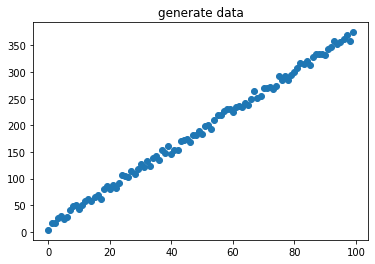

In [5]:
plt.title("generate data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [7]:
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], 
    test_size=args.test_size, 
    random_state=args.seed
)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


In [22]:
# 标准化训练集
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

In [28]:
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

In [35]:
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1

mean: [8.22952817e-17] 7.350601608872391e-17
std: [1.] 1.0


In [36]:
# 初始化模型
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)

In [37]:
lm.fit(standardized_X_train, standardized_y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
# 预测(未标准化)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [41]:
pred_train

array([275.68786764, 233.92698591, 247.84727982, 293.08823502,
       185.20595723,  32.08272423, 240.88713286,  52.96316509,
       341.8092637 , 216.52661852, 268.72772068, 143.4450755 ,
        42.52294466, 206.08639809, 286.12808807,  91.24397334,
        80.80375291, 261.76757373, 317.44874936,  94.72404682,
        39.04287119, 171.28566332,  46.00301814, 160.84544289,
        73.84360596, 174.7657368 ,  87.76389987, 105.16426725,
       209.56647157, 289.60816155, 126.04470812, 338.32919023,
        35.56279771, 310.48860241, 129.52478159, 199.12625114,
        63.40338553, 334.84911675,  77.32367943, 115.60448768,
       178.24581027, 226.96683896,  66.883459  , 244.36720634,
        59.92331205,  84.28382639,  25.12257728,  28.60265075,
        18.16243032,  56.44323857, 251.3273533 , 355.72955761,
       136.48492855, 146.92514898, 348.76941066, 192.16610418,
       362.68970457, 272.20779416, 296.5683085 , 258.28750025,
       220.006692  , 331.36904327, 327.8889698 , 167.80

In [42]:
import matplotlib.pyplot as plt
# 计算训练集和测试集的方差
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 51.40, test_MSE: 56.28


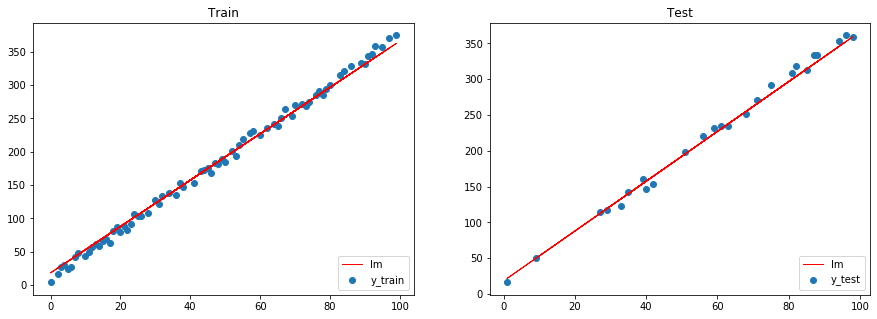

In [43]:
# 调整图大小
plt.figure(figsize=(15,5))

# 画出训练数据
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 画出测试数据
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 出图
plt.show()